In [10]:
import mlgrad.funcs as funcs
import mlgrad.loss as loss
import mlgrad.models as models
import mlgrad.cls.cls_pca as cls_pca

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [11]:
X, Y = load_iris(return_X_y=True)
Y = Y.astype("d")
X2 = X[Y != 0]
Y2 = Y[Y != 0]
Y2[Y2 == 2] = -1

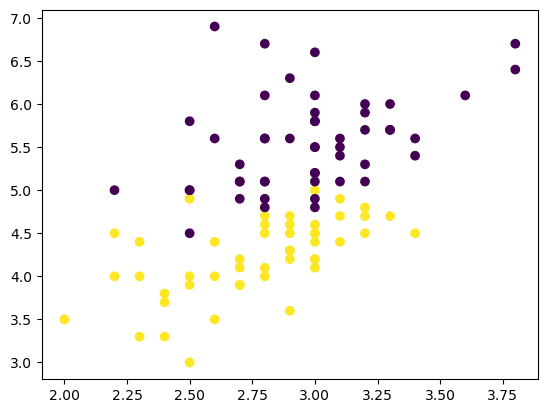

In [12]:
plt.scatter(X2[:,1], X2[:,2], c=Y2)
plt.show()

In [37]:
def make_model(n):
    mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), n)
    return mod

hinge_loss = loss.MarginLoss(funcs.Hinge(1.0))
cc, As, Us, mods = cls_pca.cls_pca(X2, Y2, hinge_loss, 4, h=0.01, n_iter=5000)
# Us = np.atan(Us)

0 : 4999 0.97
1 : 4999 0.84
2 : 4999 0.74
3 : 3327 0.69


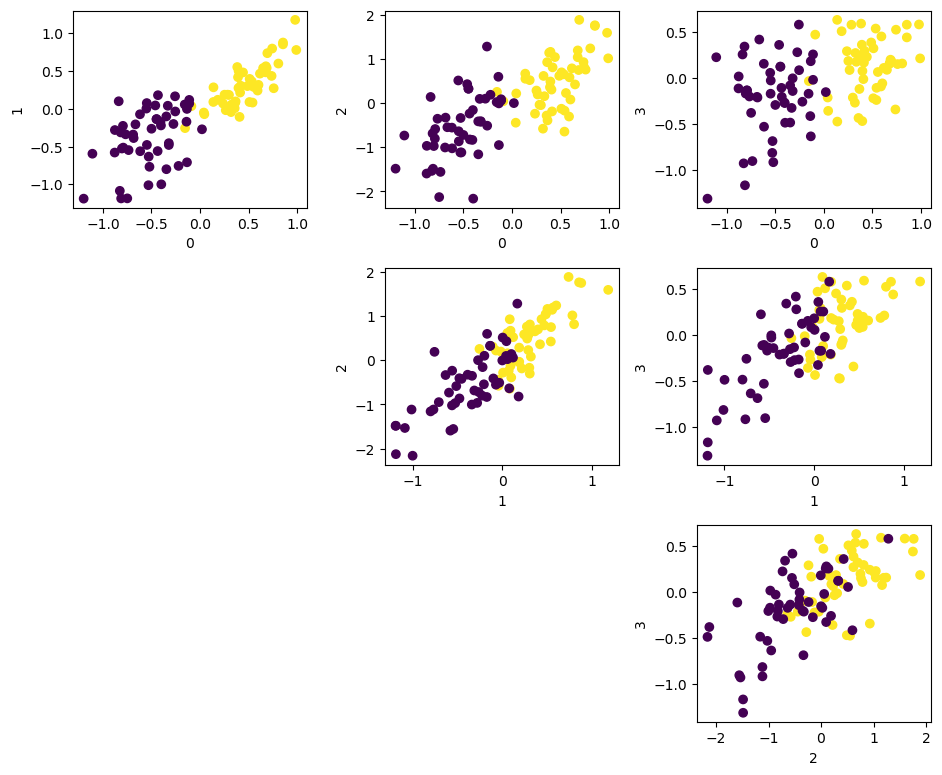

In [38]:
plt.figure(figsize=(12,10))
for i in range(3):
    for j in range(i+1,4):
        plt.subplot(4,4,4*i+j+1)
        plt.scatter(Us[i], Us[j], c=Y2)
        plt.xlabel(i)
        plt.ylabel(j)
plt.tight_layout()
plt.show()